In [ ]:
# torch.utils.data.Dataset 储存样本
# torch.utils.data.DataLoader 

In [ ]:
import torch
from torch import nn
from torch.utils.data import Dataset,DataLoader
from torchvision import models,datasets 
from torchvision import transforms as tf
import torch
from torch.utils.data import Dataset,DataLoader #常用工具区utils .data数据区
import pandas as pd
import numpy as np

In [ ]:
dir(torch.cuda.is_available())#打开某个package具有的功能并展示
help(torch.cuda.is_available)#解释包的每个功能的用法


torch.__version__#tourch版本
torch.cuda.is_available()#有没有显卡，有没有被激活 [如果为false，gpu是否支持cuda]
device = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'
#mps是苹果芯片

#在GPU上储存
#1.
x = torch.zeros(6, device='cuda') #在GPU上创建一个张量

#2.
y = p.to(device='cuda')#to()方法在CPU上创建的张量复制到GPU上
points_gpu = p.to(device='cuda:0')#如果有多个GPU，可以定义哪个
points_gpu = 2 * p.to(device='cuda') #可以乘以一个常数

points_cpu = points_gpu.to(device='cpu')
#在gpu上创建的张量，执行的运算也会在gpu上

#3.
#简写，cpu(),cuda()替换to()
points_gpu = points.cuda() 
points_gpu = points.cuda(0) 
points_cpu = points_gpu.cpu() 


#列表
a = list(range(1,4))#返回：[1,2,3]
a = [1,2,3,4,5]
a[4] = 6 #可以修改列表元素

#没有指针影响

some_list = list(range(6)) #[0,1,2,3,4,5]
some_list[:]#所有的元素
some_list[1:4]#输出1，2，3
some_list[1:] #1,2,3,4,5 切片：不包括末尾
some_list[:4] #0,1,2,3,4
some_list[:-1] #0,1,2,3,4
some_list[1:4:2] #1到4，步长为2【每隔1个数字】

float(a[1]) #转换为浮点,列表不能转浮点数

#列表转张量
y = torch.tensor(list(range(2,10)))

#numpy转换为tensor
p_n = torch.from_numpy(p_np)
#从np数组转换为张量,返回的张量tensor和numpy的ndarray共享同一内存空间

#tensor 转换为 np
p_np = p.numpy()#转换为numpy
p_np = np.array(p)

In [ ]:
#不支持一边用cpu、另一边同gpu计算
a = torch.ones(3,3)
b = torch.ones(3,3)

a = a.to('cpu')
b = b.to('cuda')
#a+b 两个在不同设备上运行（cpu、gpu）的代码不能被计算出来

In [ ]:
#张量打印设置: threshold、edgeitems、profile

torch.set_printoptions(# 打印选项： 打印浮点数时，显示什么样的经精度，显示多少元素个数）
    precision=None/6,#浮点数的精度（显示到小数点后几位，默认是4）
    threshold=None/300,
    #tensor很大，不好全部显示，显示超过一定的个数【不是行数\列数】，就将其余的折叠,默认为1000个
    edgeitems=None,#折叠后只显示前面和后面的数据,【行数】，默认为3,
    #设置为4，开头和结尾各显示4行，其余折叠
    linewidth = None, #定义每行的字符数，到达多少插入换行符，默认为80
    profile = None,#有三个选项：default,short,full short只显示两位 full四位 default任意4，8，10
    sci_mode = None#使用科学计数法 2.322e-01
    )
torch.set_printoptions(precision=None, threshold=None, edgeitems=None, linewidth=None, profile=None, sci_mode=None)

In [ ]:
# Data type        	CPU tensor       	GPU tensor
# 32-bit floating point	 torch.FloatTensor	  torch.cuda.FloatTensor
# 64-bit floating point	 torch.DoubleTensor	   torch.cuda.DoubleTensor
# 16-bit floating point	    N/A	       torch.cuda.HalfTensor
# 8-bit integer (unsigned) torch.ByteTensor	   torch.cuda.ByteTensor
# 8-bit integer (signed)	torch.CharTensor	  torch.cuda.CharTensor
# 16-bit integer (signed)	torch.ShortTensor	   torch.cuda.ShortTensor
# 32-bit integer (signed)	torch.IntTensor	    torch.cuda.IntTensor
# 64-bit integer (signed)	torch.LongTensor	  torch.cuda.LongTensor

In [ ]:
#张量 - 多维数组
a = torch.tensor([[1,2,3],[4,5,6]])

#判断
torch.is_tensor(obj)
torch.is_storage(obj)

#默认张量类型
import torch
torch.set_default_tensor_type(torch.cuda.FloatTensor)
#一般使用pytorch进行运算时候使用的都是浮点数来进行计算，所以设置默认浮点数有时候也很重要
#但不能设置整型的默认类型

#获取张量默认类型
torch.get_default_dtype()#获取张量默认类型
a = torch.tensor([1.,3])#必须是张量 不是列表
print(a.dtype,a.device)

#张量
torch.eye(n,m=None,out=None) #返回一个2维张量，对角线位置都是1，其余0 n行数，m-列数，默认为n,out=输出
torch.ones(sizes,out=None)#全一的张量,用1填充
torch.zeros(sizes,out=None)#全0的张量
torch.rand(sizes,out=None)#[0,1)的均匀分布中抽取一组随机数
torch.randn(sizes,out=None)#正态分布随机数（均值为0，方差为1）高斯白噪
torch.randperm(n,out=None)# 0 - n -1随机整数排列 比如n=8 -> 1-7之间

torch.zeros_like(points)#以points尺寸大小为准，重新填充0
torch.rand_like(x_data)
torch.randn_like(x,dtype = torch.float)


#根据步长创建一维的tensor: arange, linspace, logspace

#左闭右闭，lins = (end - start) \ steps step默认 = 100
torch.linspace(start,end,steps=100, out = None)
a = torch.linspace(1,10,steps = 4)#step:步数，走几步：分割的点数 平均分成四等分 阈值均分的张量

torch.logspace(start,end,steps = 100, out = None)
b = torch.logspace(10,-10,4,out=None)  #10**start  10 ** end 创建对数均分的1维张量
#base底数 -> 10的10次方 到 10的-10次方

torch.arange(start,end，step=1,out=None)#左闭右开：不包括end数值自己  容易受浮点舍入印象，给它加一个epsilon
torch.range(1,4)#左闭右闭 【已经被舍弃，不能用】

#arange和linspace区别：arange步长是跨几步的意思 lispace会按步长均等平分张量


#切片
a[0,0] = 2 #第0列第0行：1 -> 2
points[1:] #第一行之后的所有行
points[1:,:] #第一行之后的所有行和所有列
points[1:,0:2] #第一行之后，每行的第一列和第二列
points[None] #增加大小为1的维度，和undqueeze()方法一样

torch.numel(a)#返回input张量中的元素个数
a.shape #返回大小,返回有几行，有几列

#数据类型
# torch.float32 或 torch.float：32 位浮点数 -> 神经网络需要32位
# torch.float64 或 torch.double：64 位双精度浮点数 张量作为其他张量的索引，需要用64位
# torch.float16 或 torch.half：16 位半精度浮点数 GPU中可以用半精度减少网络占用空间
# torch.int8：8 位有符号整数。
# torch.uint8：8 位无符号整数。
# torch.int16 或 torch.short：16 位有符号整数。
# torch.int32 或 torch.int：32 位有符号整数。
# torch.int64 或 torch.long：64 位有符号整数。
# torch.bool 布尔型。

#转换类型
#1.
short_points = torch.tensor([[1,2],[3,4]], dtype=torch.short)
#2.
x = torch.zeros(10,2).double()
y = torch.ones(10,2).short()
#3.
x = torch.zeros(10,2).to(torch.double)#to()方法会检查转换是否是必要的，如果必要，则执行转换
y = torch.ones(10,2).to(dtype=torch.short)
#在操作中输入多种类型时，输入会自动向较大类型进行计算。 32位x64位 -> 按照64位计算
#因此，如果我们想要进行 32 位计算，我们需要确保所有的输入最多是 32 位的。


torch.squeeze(input,dim=None,out=None)#压缩，与储存共享，把所有为1的维度删掉
torch.unsqueeze(input,dim,out=None)#扩张


#就地操作 将结果存储到操作数中的操作称为就地操作。它们由_后缀表示。例如：x.copy_(y), x.t_(), 将改变x。
tensor.add_(5)
print(tensor)

# 转置
id(p.storage()) == id(p_t.storage()) #验证这 2 个张量共享同一个存储区
some_t = torch.ones(3,4,5)
transpose_t = some_t.transpose(0,2)
# 通过指定 2 个维度，即翻转形状和步长，来转置一个多维数组

#一个张量的值在存储区中从最右的维度开始向前排列被定义为连续张量
#利用 contiguous()方法，我们可以通过一个非连续张量得到一个新的连续张量
p.is_contiguous() #判断是否连续

p = torch.tensor([[1,2,3],[4,5,6]])
p_t = p.t()#转置t()
print(p_t.storage())#不连续，还是原来的1，2，3，4，5，6
p_c = p_t.contiguous()#转成连续，1，4，2，5，3，6
print(p_c.storage())

torch.t()#2维张量，并转置0，1
torch.transpose(input,dim0,dim1,out=None)#转置


In [ ]:
#CAT、CHUNK、GATHER
a = torch.tensor([[1,2,3],[4,5,6]])
b = torch.tensor([[7,8,9],[10,11,12]])
c = torch.cat((a,b),dim=1)#拼接张量,唯独必须相同
# tensor([[ 1,  2,  3,  7,  8,  9],
#     [ 4,  5,  6, 10, 11, 12]])
#有前后顺序，
#dim=0行 ->按行依次向下排列 
#dim=列 -> 按列对其，横排

torch.stack(sequence,dim=0)#沿着一个新维度对输入张量序列进行连接。序列中所有的张量都应该为相同形状。
#只允许是序列, python的序列数据只有list和tuple

#分解张量:chunk、split、unbind
torch.chunk(tensor,chunks,dim=0)
#张量、分块的个数：要分几块【数量】、沿着维度分
x = torch.chunk(c,2,dim=0) #均匀分成若干个小tensor

#进阶版CHUNK 能够指定分割每一块的长度[2,1,1] 第一个张量：2，第二、三个张量：1
torch.split(tensor,split_size,dim=0)#按分数均匀分割，按特定方案进行分割
# 如果沿指定维的张量形状大小不能被split_size 整分， 则最后一个分块会小于其它分块。
a = torch.tensor([[0,1,2,3],[4,0,0,1],[5,5,5,5],[6,6,6,6]])
split_size = [2,1,1]#2+1+1= 4
b = torch.split(a,split_size,dim=1))#单个分块的形状大小split_size = 1 列表数为1

torch.unbind(tensor,dim=0)#返回指定维度切片后的【元组】，按【行】或【列】


#聚合张量:gather
torch.gather(input,dim,index,out=None)
#输入【按索引张量】指定【位置】的值进行聚合（连接）

a = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
b = torch.tensor([[7,8,9],[10,11,12]])
index = torch.tensor([[0,1,2],[1,2,0],[2,0,1]])
x = torch.gather(a,1,index)#从原tensor中获取指定dim和指定index的数据
#不要写dim=0，只写0
print(x)

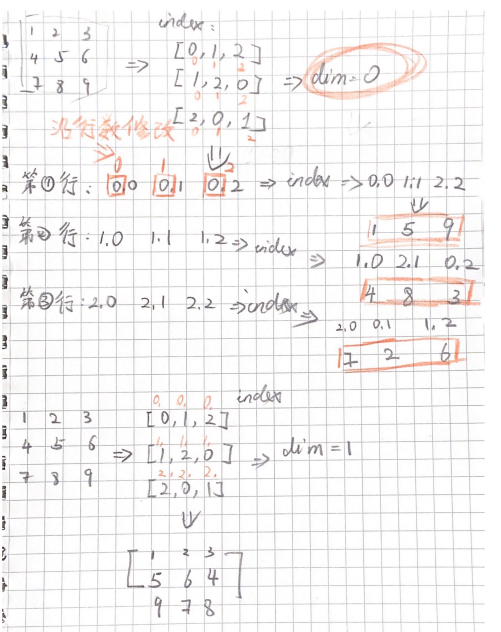

In [ ]:
torch.index_select(input,dim,index,out=None)
#进行切片，返回的张量不与原始张量共享内存空间

indices= torch.cuda.LongTensor([0,2])#返回第一0行、第2行
a = torch.index_select(a,0,indices)#index 为一个LongTensor
torch.index_select(x, 1, indices) #返回第0列和第2列

torch.masked_select(input,mask,out=None)#masked_select

torch.nonzero(input,out=None)#返回非零元素的索引
a = torch.tensor([[0,1,2,3],[4,0,0,1]])
torch.nonzero(a)

In [ ]:
torch.manual_seed(seed)#设定生成随机数的种子，并返回一个 torch._C.Generator 对象.
torch.initial_seed #返回生成随机数的原始种子值
torch.get_rng_state()[source] #返回随机生成器状态
torch.set_rng_state(new_state)[source]#设定随机生成器状态 参数: new_state (torch.ByteTensor) – 期望的状态
torch.default_generator = <torch._C.Generator object>
# 设定随机生成器状态 参数
torch.bernoulli(input, out=None)
#从伯努利分布中抽取二元随机数(0 或者 1)

torch.multinomial(input, num_samples,replacement=False, out=None)
#每行包含从input相应行中定义的多项分布中抽取的num_samples个样本

torch.normal(means, std, out=None)
#包含从给定参数means,std的离散正态分布中抽取随机数

In [ ]:
# 储存
points.storage()
#不管是两列三行，还是三行两列，在储存区都是大小为6的连续数组【一维的】
#改变储存区张量保存的值也会改变张量的值

p = torch.tensor([[4,1],[5,3],[2,1]])
s = p[1]
s.storage_offset()#偏移量位2，因为需要跳过[4,1]
s.stride()#步长，每个维度增加1时，在存储区中必须跳过的元素数量

#访问一个二维张量中的位置(i,j)的元素会导致访问存储中的第 storage_offset+stride[0]*i+stride[1]*j 个元素

#因为需改子张量会改变张量，所以可以用复制方法解决
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]]) #创建一个张量
second_point = points[1].clone() #复制上一个张量，创造为新的张量
second_point[0] = 10.0 #改变子张量
points #上一个张量没有发生变化

#PyTorch 用结尾以下画线标识的函数来表示该函数在张量上执行操作，如 Tensor.sqrt_


#保存
torch.save(obj, f, pickle_module=<module 'pickle' from '/home/jenkins/miniconda/lib/python3.5/pickle.py'>, pickle_protocol=2)
#张量使用 pickle 来序列化张量对象，将其储存

#1.save()
torch.save(p,'/content/weight.t')#将张量保存到文件里

#2.open()后保存
with open('/content/weight.t') as f:
  torch.save(p,f)


#加载张量
torch.load(f, map_location=None, pickle_module=<module 'pickle' from '/home/jenkins/miniconda/lib/python3.5/pickle.py'>)
#map_location – 一个函数或字典规定如何remap存储位置
#1.load()
points = torch.load('/content/weight.t') 

#2.open()后加载load
with open('../data/p1ch3/ourpoints.t','rb') as f: 
 points = torch.load(f) 

#移植到其他库
#使用 HDF5 格式和 h5py 库

In [ ]:
# 命名

batch_t = torch.randn(2,3,5,5) 
#RGB通道可能在第0维或第1维，但它总是在倒数第3维上【channels,rows,,coulums】
img_gray_naive = img_t.mean(-3)

weights_named = torch.tensor([0.2126,0.7152,0.0722],names=['channels'])#命名

#refine_names()
img_named = img_t.refine_names(...,'channels','rows','columns')
#...可以省略之前的维度，从倒数第三个维度开始命名
batch_named = batch_t.refine_names(...,'channels','rows','columns')
#rename方法可以覆盖或删除现有名称

#align_as()添加缺失的维度
weights_aligned = weights_named.align_as(img_named)


gray_named = (img_named * weights_aligned).sum('channels')#接收维度参数的函数

#重命名为None来删除名称
gray_plain = gray_named.rename(None)


In [ ]:
#并行化
torch.get_num_threads()#获得用于并行化CPU操作的OpenMP线程数
torch.set_num_threads(int) #设定用于并行化CPU操作的OpenMP线程数

### 数学操作

In [ ]:
torch.add(input,value)#加法 out=input【tensor】 + value; 两个张量相加 需要尺寸相等
torch.sum(input)#所有元素的和
torch.exp(input)#指数
torch.log(input)#自然对数
torch.loglp(input)#log(input+1) 对值比较小的输入，此函数比torch.log()更准确
torch.abs(input,out=None)#绝对值

torch.div(input,value)#除法
torch.fmod(input,divisor) #计算除法余数
torch.remainder(input,divisor) #计算除法余数
torch.frac()#返回分数部分

torch.mul(input,value)#乘法
torch.prod(input)#所有元素的积
torch.neg(input)#按元素取负，out = -1 * input
torch.pow(input,exponent)# 幂值 x ** expo
torch.sqrt(input#平方根)
torch.reciprocal(input)#每个元素的倒数 1\x
torch.rsqrt(input) #平方根倒数


torch.cumprod(input,dim)#累积积
torch.cumsum(input,dim)#累计和 1+2=3 3+4=7 7+5=13
torch.dist(input,other,p=2)#范数p
torch.mean(input)#所有元素均值
torch.std(input，dim)#标准差
torch.var(input)#方差
torch.median(input,dim=-1,values=None,indices=None)
#返回输入张量给定维度每行的中位数，同时返回一个包含中位数的索引的LongTensor

# 返回给定维dim上，每行的众数值。 同时返回一个LongTensor，包含众数职的索引
# dim值默认为输入张量的最后一维
torch.mode(input,dim=-1,values=None,indice=None)
torch.norm(input,p=2)#p范数


torch.lerp(start,end,weight)#对两个张量以start，end做线性插值，将结果返回到输出张量
#out = start + weight(end - start)

torch.clamp(input,min,max)#小于min的数改成min本身,在区间不变，大于max改成max本身

a = torch.tensor([1,2,3,4,4,5,5,5,8,9])
b = torch.clamp(a,4,8)#返回为：[4, 4, 4, 4, 4, 5, 5, 5, 8, 8]


torch.ceil(input)#向上取整:1.3 -> 2, 0.39 -> 1
torch.floor(input))#向下取整:1.3 -> 1, 0.39 -> 0
torch.round(input)#四舍五入

torch.sigmoid(input)#sigmoid值
torch.sign(input)#返回每个元素的正负： -0.5544 -> -1; 0.2232 -> 1
torch.trunc()#小数部分被舍弃: 0.8877 -> 0, 1.8989 -> 1

torch.cos(input)#余弦
torch.cosh()#双曲余弦
torch.sin()#正弦
torch.sinh()#双曲正弦
torch.tan()#正切
torch.tanh()#双曲正切

torch.acos()#反余弦
torch.asin()#反正弦
torch.atan()#反正切
torch.atan2#包含两个输入张量input1和input2的反正切函数

torch.addcmul(tensor,value,tensor1,tensor2) #相乘再相加 【不好用】
torch.addcdiv#已被删除，(tensor2 / tensor1) * value + tensor


In [ ]:
#比较

torch.eq(input,other)#比较元素相等性,元素相等为1，不等为0
torch.equal(tensor1,tensor2)#如果两个张量形状、元素值都相同，返回true,否则false
torch.ge(input,other)#逐元素比较input和other，即是否 input>=other
torch.gt(input,other)#逐元素比较input和other，即是否input>other
torch.le(input,other) #逐元素比较input和other，即是否input<=other
#第二个参数可以为一个数或与第一个参数相同形状和类型的张量

torch.lt(input,other) #逐元素比较input和other， 即是否 input<other
# 包含了每个位置的比较结果(是否 tensor >= other )


torch.max()#返回最大值，数值+indices
torch.min()#返回最小值，数值+indices
torch.ne(input,other)#input和other比较，input!=other
torch.sort(input,dim=None,descending=False) #沿着dim升序排列，descending=true 降序

torch.kthvalue(input,k,dim=None)
# 指定维上第k小的数据。如果不指定dim，则默认为input的最后一维
torch.topk(input,k,dim=None,largest=True,sorted=True)
#返回输入张量input中 k 个最大值，如果为largest为 False ，则返回最小的 k 个值
#如果设定布尔值sorted 为_True_，将会确保返回的 k 个值被排序

In [ ]:
torch.cross(input, other, dim=-1)#两个张量的向量积（叉积）
torch.dot(tensor1, tensor2)#计算两个张量的点乘(内乘)
torch.eig(a, eigenvectors=False, out=None)#计算实方阵a 的特征值和特征向量

torch.diag(input, diagonal=0)
torch.histc(input, bins=100, min=0, max=0)
torch.renorm(input, p, dim, maxnorm)
torch.trace(input)
torch.tril(input,k=0)
torch.triu(input,k=0)

torch.addbmm(beta=1, mat, alpha=1, batch1, batch2)
torch.addmm(beta=1, mat, alpha=1, mat1, mat2)
torch.addmv(beta=1, tensor, alpha=1, mat, vec)
torch.addr(beta=1, mat, alpha=1, vec1, vec2)
torch.baddbmm(beta=1, mat, alpha=1, batch1, batch2)
torch.bmm(batch1, batch2)
torch.btrifact(A, info=None)
torch.btrisolve(b, LU_data, LU_pivots)
torch.gels(B, A)
torch.geqrf(input)
torch.ger(vec1, vec2)
torch.gesv(B, A)
torch.inverse(input)
torch.mm(mat1, mat2)
torch.mv(mat, vec)
torch.orgqr()
torch.ormqr()
torch.potrf()
torch.potrs()
torch.pstrf()
torch.qr(input)
torch.svd(input, some=True)
torch.symeig(input, eigenvectors=False, upper=True)
torch.trtrs()

https://pytorch-cn.readthedocs.io/zh/latest/package_references/torch/

https://pytorch.org/vision/stable/datasets.html

https://wizardforcel.gitbooks.io/learn-dl-with-pytorch-liaoxingyu/content/

## 导入一个现有的数据库

In [ ]:
#PyTorch 提供特定领域的库 - TorchText、TorchVision、TorchAudio

traning_data = datasets.FashionMNIST(
    root="data",#储存位置
    train=True,#下载训练数据，false下载测试数据
    download=True,#下载
    transform = preprocess#转换
    target_transform = ...
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,#否，因为这是测试数据
    download=True,
    transform=ToTensor(),
)
# Dataset存储样本及其对应的标签


In [ ]:
torch.multiprocessing

In [ ]:
preprocess = tf.Compose([
    tf.Resize(256),
    tf.CenterCrop(224),
    tf.ToTensor(),
    tf.Normalize(0.5,0.5)]
)#数据预处理


#DataLoader在周围包装一个可迭代对象Dataset，以便轻松访问样本

dataloader = DataLoader(
    data,
    shuffle=True,
    batch_size = 64 #8,16,32,64,256,512)

In [ ]:
data  = datasets.FashionMNIST(
    root = 'data',
    download = True,
    train = True,
    transform = preprocess
)
dataloader = DataLoader(
    data,
    shuffle = True,
    batch_size = 64
)

NameError: ignored

In [ ]:
for x,y in dataloader:
  print(x.shape,y.shape,y.dtype)
  break

torch.Size([64, 1, 224, 224]) torch.Size([64]) torch.int64


In [ ]:
imgs,_ = next(iter(dataloader))
img.shape

torch.Size([64, 1, 224, 224])

In [ ]:
device = "cuda" if torch.cuda.is_available() 
else "mps" if torch.backends.mps.is_available() 
else "cpu"
#mps 苹果芯片的gpu

#dim=0表示行，dim=1表示列

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    self.flatten = nn.Flatten()#扁平化，把28乘以28的图转换成784个像素连续数组
    self.Linears = nn.Sequential(#nn.Linear => 储存权重和偏差
        nn.Linear(224*224,512),#sequential有序的模块容器，数据按照定义的相同顺序通过所有模块
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),#帮助神经网络学习各种各样的现象。
        nn.Linear(512,10)
        nn.Softmax(dim=1)#这个维度dim的总和需要为1
    )

    def forward(self,x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

#模型参数
#parameters() 和 named_parameters() 所有的参数通过这些方法访问

# for _,param in model.named_parameters():
#   print(param.size(),param[:1])

NameError: ignored

In [ ]:
import torch.nn as nn
import torch

a = torch.randn(1,28,28)
b = nn.Flatten()
a = b(a)
a.size()

torch.Size([1, 784])

In [ ]:
import torch
import  torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms 
from torch.utils.data import DataLoader

In [ ]:
preprocess = transforms.Compose([
    transforms.ToTensor()
])

train_data = torchvision.datasets.MNIST(root = 'data',
                    train = True,
                    download = True,
                    transform = preprocess)
batch_size = 64
dataloader = DataLoader(train_data,batch_size,shuffle = True)


In [ ]:
import matplotlib.pyplot as plt

#整个图片为一个figure对象，包含多个axes
plt.plot() # 绘图函数
plt.show() # 显示图像

figure = plt.figure(figsize = (8,8))
print(figure)

Figure(576x576)


<Figure size 576x576 with 0 Axes>

In [ ]:
from torch.nn.modules.container import Sequential

class ShuakNet(nn.Module):

  def __init__(self):
    super(ShuakNet, self).__init__()
    self.flatten = nn.Flatten()
    self.main = nn.Sequential(
        nn.Linear(28*28,256),
        nn.ReLU(),
        nn.Linear(256,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.Sigmoid()

    )
  
  def forward(self,x):
    x = self.flatten(x)
    out = self.main(x)
    return out

device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"

model = ShuakNet().to(device)


In [ ]:
x = torch.rand(1,28,28,device=device)
out = model(x)
out

tensor([[0.4947, 0.5313, 0.4896, 0.4871, 0.5033, 0.4655, 0.5242, 0.4692, 0.4949,
         0.5015, 0.4902, 0.4940, 0.5196, 0.4849, 0.5034, 0.4940, 0.5001, 0.5260,
         0.5031, 0.5205, 0.5130, 0.4977, 0.5180, 0.4890, 0.4950, 0.4824, 0.5063,
         0.4942, 0.5138, 0.4937, 0.4836, 0.4987, 0.5259, 0.4698, 0.4811, 0.4868,
         0.4840, 0.4834, 0.4994, 0.4982, 0.4808, 0.4826, 0.4946, 0.4768, 0.4948,
         0.4971, 0.4769, 0.4681, 0.5014, 0.4958, 0.4884, 0.4829, 0.5403, 0.5003,
         0.5083, 0.5074, 0.5128, 0.5250, 0.4971, 0.5029, 0.4843, 0.5512, 0.4856,
         0.5084, 0.4986, 0.4785, 0.5186, 0.5201, 0.5049, 0.4878, 0.4940, 0.5358,
         0.4936, 0.5147, 0.4996, 0.5180, 0.5066, 0.5147, 0.4779, 0.4842, 0.4970,
         0.5010, 0.4927, 0.4858, 0.5088, 0.5050, 0.4965, 0.5012, 0.5285, 0.5024,
         0.5024, 0.4951, 0.4988, 0.5104, 0.4877, 0.5082, 0.5125, 0.5064, 0.4954,
         0.4946, 0.4986, 0.4757, 0.4833, 0.4968, 0.5168, 0.5203, 0.5016, 0.4981,
         0.5080, 0.5029, 0.4

In [ ]:
for _,param in model.named_parameters():
  print(param.size(),param[:1])

torch.Size([256, 784]) tensor([[-7.4599e-03,  1.0246e-02,  6.4714e-03, -1.5334e-02,  2.6000e-02,
         -3.4346e-02, -7.1436e-03, -2.9739e-02,  2.3786e-02, -3.4255e-02,
          2.3552e-02,  1.9966e-02, -2.2366e-02, -7.1000e-03, -2.3607e-02,
          1.9595e-02,  1.1032e-02,  1.0366e-02, -2.9233e-02, -3.7199e-04,
         -7.9276e-03, -2.1303e-02,  8.8358e-03,  2.2164e-04,  1.8295e-02,
         -1.7812e-02,  1.0451e-02,  3.4345e-02, -5.2105e-03, -2.2717e-02,
          2.5669e-02,  2.4027e-04,  5.3558e-03, -1.1378e-02, -3.7818e-03,
          4.0863e-03, -2.6178e-02,  2.5104e-02,  2.5202e-02,  8.8700e-03,
         -2.8296e-02,  2.0268e-02,  1.2817e-02,  3.1908e-02,  1.7056e-02,
         -1.3562e-02,  1.0989e-03, -2.0550e-02,  1.2552e-02,  1.3644e-02,
          4.1648e-03, -1.8971e-03,  1.8136e-02, -4.3250e-04, -4.4339e-03,
         -1.2952e-02,  3.7529e-03,  1.5019e-02,  2.8519e-02, -1.1352e-02,
          8.8529e-03, -1.5080e-02, -3.0072e-02,  2.6959e-02, -3.3789e-02,
          4.701

In [ ]:
size = len(dataloader.dataset)
x = len(dataloader)
print(size,x)

60000 938


In [ ]:
x = torch.tensor([[1,2],[3,4],[5,6]])
y = torch.zeros_like(x)
a = torch.cat([x,y],dim=0)
a

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [0, 0],
        [0, 0],
        [0, 0]])

In [ ]:
#就地操作 将结果存储到操作数中的操作称为就地操作。它们由_后缀表示。例如：x.copy_(y), x.t_(), 将改变x。
tensor.add_(5)
print(tensor)

In [ ]:
b = torch.randn_like(x,dtype = torch.float)
b

tensor([[ 1.2457, -0.5194],
        [ 1.4022, -0.6929],
        [-1.2120, -0.4889]])

In [ ]:
#训练数据需要损失函数、优化器
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 1e-3)

In [ ]:
def train(dataloader,model,loss_fn,optimizer):
  size = len(dataloader.dataset)#计算所有数据的大小
  model.train()
  for batch, (x,y) in enumerate(dataloader):
    x,y = x.to(deivce), y.to(device)#batch是批次，6000个数据64分，有了从0-937的批次
    #x是数据，y是标签

    #计算机预测错误
    pred = model(x)#数据结果
    loss = loss_fn(pred,y)#计算输出与预期的差距

    #反向传播
    optimizer.zero_grad()#重置模型梯度
    loss.backward()
    optimizer.step() #调用通过在反向传递中收集的梯度来调整参数

    if batch % 100 == 0:
      loss, current = loss.item(),(batch + 1) * len(x)
      print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")



In [ ]:
def test(dataloader,model,loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)

  model.eval()

  test_loss, correct = 0,0
  with torch.no_grad():
    for x,y in dataloader:
      x,y = x.to(device),y.to(deivice)
      pred = model(x)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

epoch = 5#进行了几次迭代
for t in tange(epochs):
      print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

In [ ]:
torch.save(model.state_dict(), "model.pth")
#保存模型的常用方法是序列化内部状态字典（包含模型参数）。
#model.load_state_dict(data_model)

#加载模型的过程包括重新创建模型结构并将状态字典加载到其中。

model = NeuralNetwork()#创建实例
model.load_state_dict(torch.load("model.pth"))

